In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from operator import mul
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def cal_rcoef(x,y):
  n= len(x)
  sum_xy= sum(list(map(mul,x,y)))
  sum_x2= sum(list(map(mul,x,x)))
  m = (n*sum_xy- sum(x)*sum(y))/(n*sum_x2-sum(x)*sum(x))
  c= (sum(y)-m*sum(x))/n
  return(c,m)

In [ ]:
def plot_regline(x,y,b):
  plt.scatter(x,y,color="y", marker="o", s=40)
  y_pred= np.float_(x)*b[1]+b[0]
  plt.plot(x,y_pred,color='b')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show

In [ ]:
df = pd.read_csv("/content/weather.csv")

FileNotFoundError: ignored

In [ ]:
print(df)

print(y)

     MinTemp  MaxTemp
0       10.1     27.9
1       10.1     31.2
2       10.1     29.9
3       10.1     28.2
4       10.2     15.0
..       ...      ...
131     17.9     33.9
132     18.0     34.9
133     18.2     22.6
134     19.9     22.0
135     20.9     35.7

[136 rows x 2 columns]
[27.9 31.2 29.9 28.2 15.  27.8 21.3 20.9 15.1 21.7 25.2 25.8 29.2 26.1
 18.  21.7 32.3 27.4 27.1 25.9 29.3 26.3 19.6 30.  21.5 27.6 30.2 18.5
 21.1 24.3 28.9 23.8 27.6 30.9 27.5 24.1 27.8 33.8 30.2 32.1 32.3 24.4
 19.9 31.7 29.9 19.9 26.9 23.1 18.2 20.2 28.8 28.6 25.1 18.5 21.  24.9
 28.  31.8 28.2 14.8 17.4 19.4 31.3 33.1 15.5 22.2 26.5 31.7 24.1 34.2
 27.4 23.4 31.2 33.5 35.2 34.7 26.9 26.7 35.  34.1 31.6 24.3 20.7 21.8
 24.2 24.2 34.2 29.5 17.3 24.8 28.8 29.4 24.3 20.4 28.3 20.4 26.2 25.1
 33.4 19.6 33.2 28.4 35.  33.8 25.7 21.1 22.4 33.4 26.9 23.4 19.9 22.8
 23.8 26.8 24.8 19.4 28.2 33.9 30.3 24.2 25.3 22.8 28.9 33.8 29.6 25.8
 24.7 29.9 35.8 27.8 33.2 33.9 34.9 22.6 22.  35.7]


In [ ]:
x = df.iloc[:,0:1].values
y = df.iloc[:,1].values
print(x)
print(y)
b =cal_rcoef(x,y)
print('Intercept: ',b[0]) 
print('Regression Coefficient: ',b[1])
plot_regline(x,y,b)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) 
regression = LinearRegression()
regression.fit(x_train,y_train)

# m= regression.coef_
# c= regression.intercept_


In [ ]:
x_train, y_train

In [ ]:
y_pred = regression.predict(x_test)
df1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted y ': y_pred.flatten()})
df1

,Actual,Predicted y
0,30.2,25.853673
1,15.1,25.370059
2,21.0,26.337288
3,26.8,27.876060
4,31.7,26.205393
5,24.2,27.084691
6,19.6,25.809709
7,28.8,26.293323
8,19.9,26.205393
9,21.5,25.853673


In [ ]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('Root-Square: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  4.353270160282661
MSE:  25.743416543758226
Root-Square:  5.073797053859981


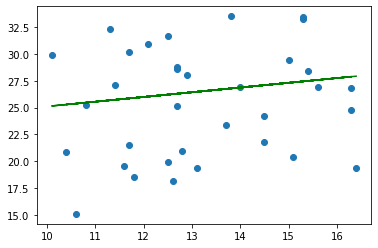

In [ ]:
plt.scatter(x_test,y_test) 
plt.plot(x_test,y_pred,color='g')